<a href="https://colab.research.google.com/github/khannana/khannana/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/data_eda/'
airbnb_df = pd.read_csv(path + 'Copy of Airbnb NYC 2019.csv')

# Data Profiling and Cleansing 

In [ ]:
# Summary of the data 
airbnb_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df = airbnb_df.rename(columns = {"neighbourhood_group":"State","neighbourhood":"City"})

In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df[airbnb_df.columns[0]].count()

48895

In [ ]:
print(f"Number of rows : " ,airbnb_df[airbnb_df.columns[0]].count())

print(f"Number of Series : " ,len(airbnb_df.columns.to_list()))
print("     ")
print("      ")
print(f"Features : ",airbnb_df.columns.values)
print("     ")
print("      ")
print(f"Number of missing values : ", sum(list(airbnb_df.isna().sum())))
print("     ")
print("      ")
print(f" Columns list with count of missing values")
print(airbnb_df.isna().sum() )


Number of rows :  48895
Number of Series :  16
     
      
Features :  ['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
     
      
Number of missing values :  20141
     
      
 Columns list with count of missing values
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listin

In [ ]:
# Drop unnecessary attributes which is not relevant to book a room: id, host_name and  last_review
airbnb_df = airbnb_df.drop(['id','host_name','last_review'], axis = 1)


In [ ]:
airbnb_df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<function matplotlib.pyplot.show>

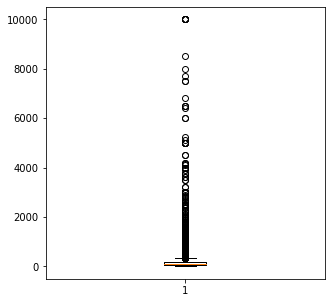

In [ ]:
plt.figure(figsize =(5,5))
plt.boxplot(airbnb_df["price"])
plt.show

In [ ]:
# Number of different neighbourhood group
state_count = airbnb_df['State'].value_counts().reset_index().rename(columns = {'index':'State','State':'count'})
state_count

,State,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [ ]:
#airbnb_df['neighbourhood'].value_counts()

In [ ]:
airbnb_df.reviews_per_month.fillna(0,inplace = True)

In [ ]:
airbnb_df.head()

,name,host_id,State,City,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


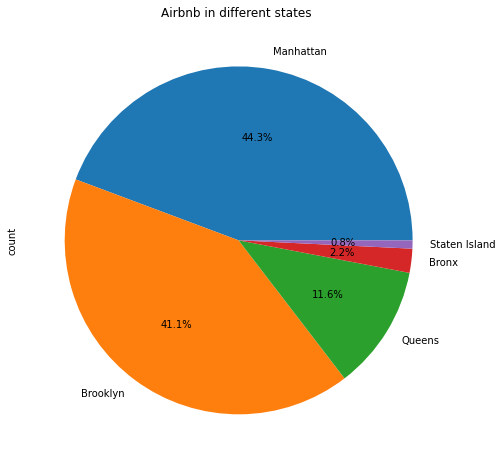

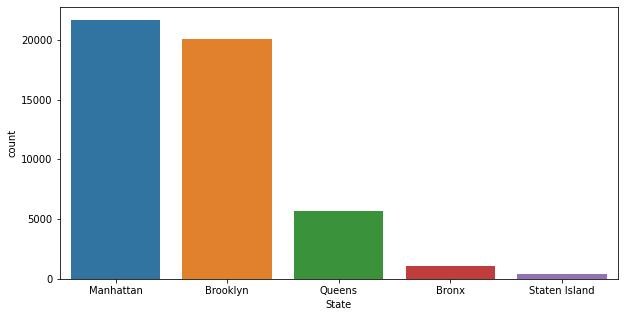

In [ ]:
# Pie Chart of different neighbourhood groups by count
state_count.index = state_count['State']
plotPie = state_count.plot.pie(y = 'count', autopct = '%1.1f%%', legend = False, title = 'Airbnb in different states ', figsize = (15, 8))
#plt.show()
plt.figure(figsize = (10,5))
sns.barplot(x = "State", y = "count", data = state_count )


In [ ]:
# Comparing neighbourhood group with avg price
state_and_avg_price = airbnb_df.groupby("State")["price"].mean().reset_index().rename(columns = {"price":"Avg_Price"}).sort_values(by = "Avg_Price", ascending = False)
state_and_avg_price


,State,Avg_Price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


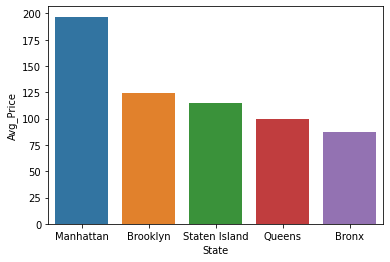

In [ ]:
sns.barplot(x = "State", y = "Avg_Price", data = state_and_avg_price)
plt.show()

In [ ]:
# number of airbnb in different neighbourhood
airbnb_in_neighbourhood = airbnb_df["neighbourhood"].value_counts().reset_index().head(15).rename(columns = {"index":"neighbourhood","neighbourhood":"count"})
airbnb_in_neighbourhood

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


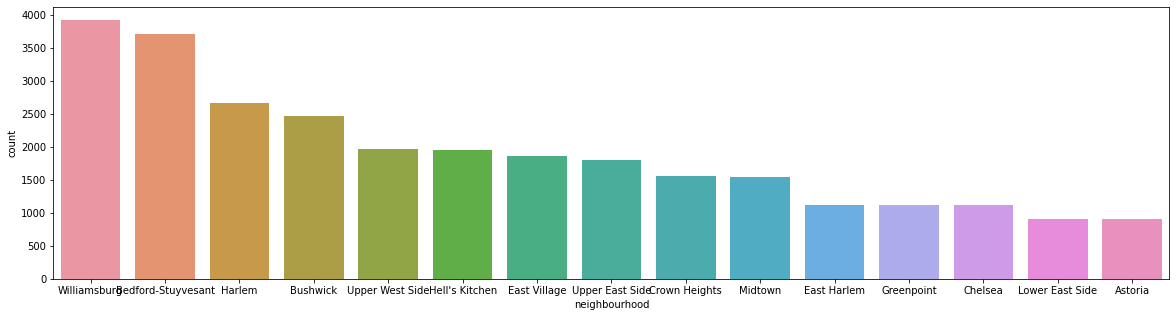

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(x= "neighbourhood", y = "count", data = airbnb_in_neighbourhood)


In [ ]:
# neighbourhood with average price 
neighbourhood_and_avg_price = airbnb_df.groupby("neighbourhood")["price"].mean().reset_index().rename(columns = {"price":"Avg_Price"}).sort_values(by = "Avg_Price", ascending = False).head(15)

In [ ]:
neighbourhood_and_avg_price

,neighbourhood,Avg_Price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
157,Prince's Bay,409.500000
6,Battery Park City,367.557143
75,Flatiron District,341.925000
161,Randall Manor,336.000000
144,NoHo,295.717949


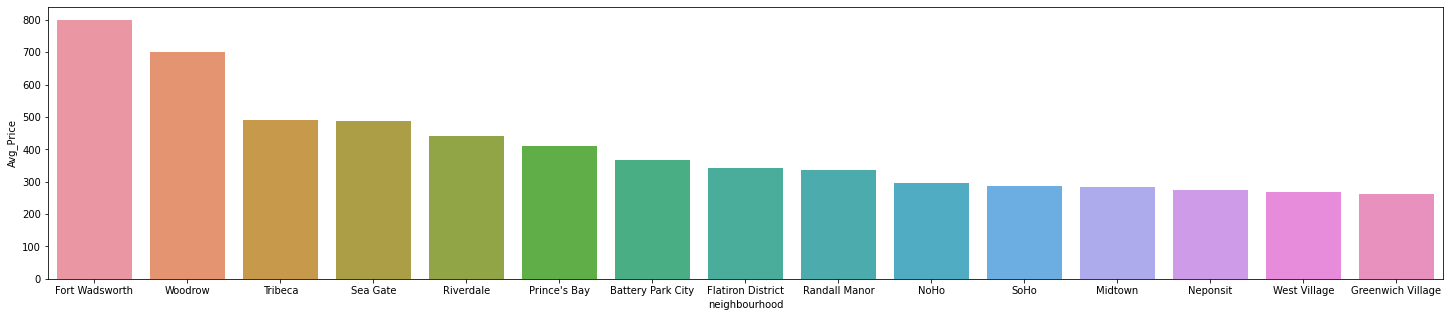

In [ ]:
plt.figure(figsize = (25, 5))
sns.barplot(x= "neighbourhood", y = "Avg_Price", data = neighbourhood_and_avg_price)

In [ ]:
room_type_with_count = airbnb_df['room_type'].value_counts().reset_index().rename(columns = {"index":"room_type","room_type":"count"})

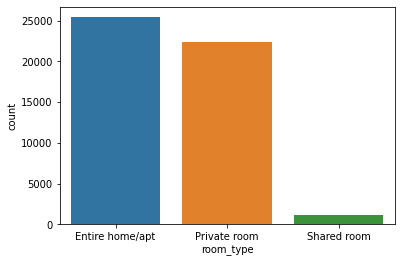

In [ ]:
sns.barplot(x= "room_type", y = "count", data = room_type_with_count)

In [ ]:
room_type_with_avg_price = airbnb_df.groupby('room_type')["price"].mean().reset_index().rename(columns = {"price":"Avg_price"})
room_type_with_avg_price

,room_type,Avg_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


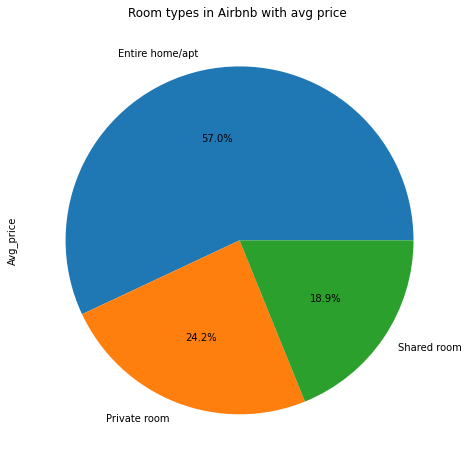

In [ ]:
room_type_with_avg_price.index = room_type_with_avg_price['room_type']
plotpie = room_type_with_avg_price.plot.pie(y = 'Avg_price', autopct = '%1.1f%%', legend = False, title = 'Room types in Airbnb with avg price ', figsize = (15, 8))
plt.show()

In [ ]:
airbnb_df.groupby(["neighbourhood_group","room_type"]).size().reset_index()

,neighbourhood_group,room_type,0
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [ ]:
neighbourhood_group_n_room_type_price_df = airbnb_df.groupby(["neighbourhood_group","room_type"])["price"].mean().reset_index().rename(columns={"price":"avg_price"})
neighbourhood_group_n_room_type_price_df

,neighbourhood_group,room_type,avg_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


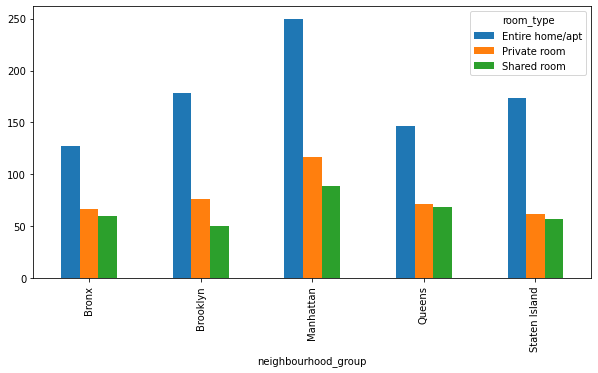

In [ ]:
pd.pivot_table(neighbourhood_group_n_room_type_price_df, index ="neighbourhood_group", columns ="room_type", values = "avg_price").plot.bar(figsize = (10, 5))


In [ ]:
airbnb_reviews_df= airbnb_df[airbnb_df["number_of_reviews"] < 200]


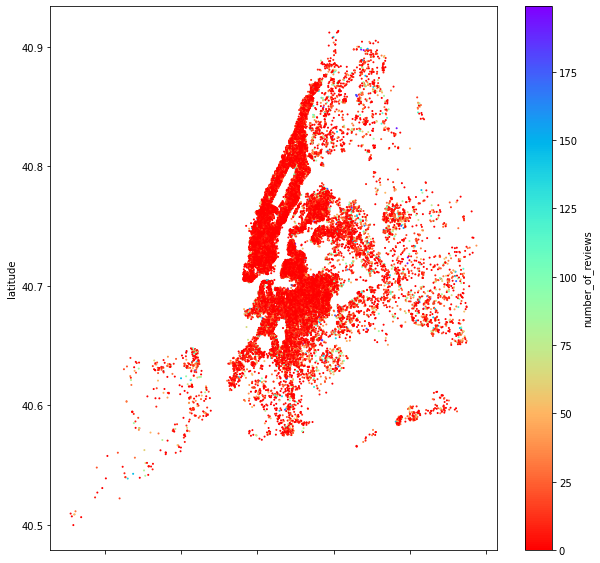

In [ ]:
airbnb_reviews_df.plot.scatter(x = "longitude", y = "latitude", c ="number_of_reviews", cmap = plt.get_cmap("rainbow_r"), s = 1, figsize = (10,10))

In [ ]:
airbnb_price_df = airbnb_df[airbnb_df["price"] < 200]

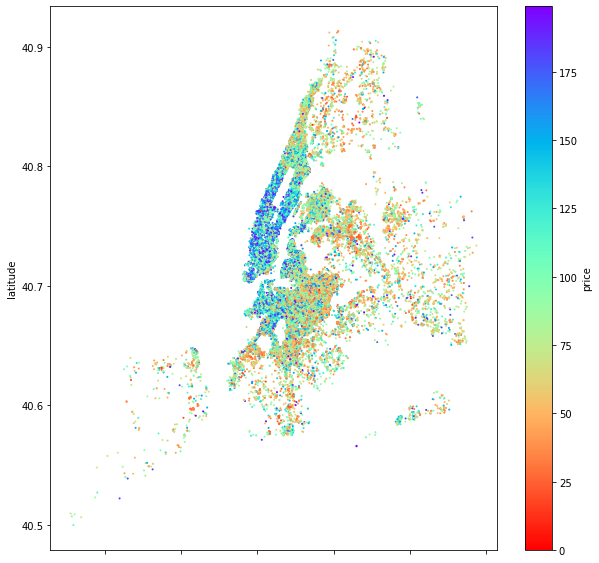

In [ ]:
airbnb_price_df.plot.scatter(x = "longitude", y = "latitude", c ="price", cmap = plt.get_cmap("rainbow_r"), s = 1, figsize = (10, 10))

In [ ]:
from PIL import Image
img = Image.open("/content/drive/MyDrive/New_York_City_.png")

In [ ]:
cordinates = airbnb_df.loc[:, ["longitude", "latitude"]].copy()


In [ ]:
# Apply min max scaler on the cordinates so that we can plot in on the image
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
min_max_scaler = MinMaxScaler()
coords = pd.DataFrame(min_max_scaler.fit_transform(cordinates), columns = cordinates.columns )
coords


,longitude,latitude
0,0.511921,0.357393
1,0.490469,0.614199
2,0.569257,0.748252
3,0.565324,0.722820
4,0.506972,0.599802
...,...,...
48244,0.554109,0.432502
48245,0.585684,0.488906
48246,0.556517,0.762117
48247,0.476639,0.623612


<function matplotlib.pyplot.show>

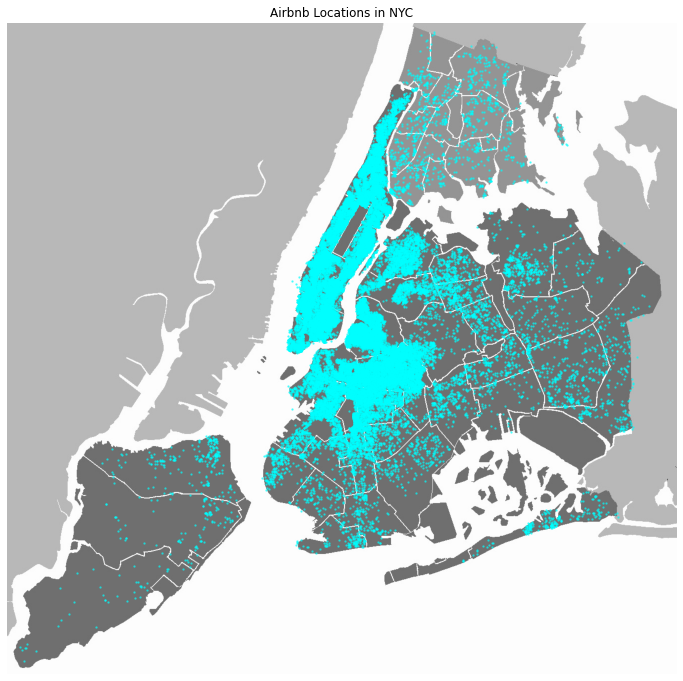

In [ ]:
plt.figure(figsize=(12, 12))
plt.axis("off")
plt.imshow(img, extent = (-0.02,1.045,-0.02,1.015))
plt.scatter(x=coords["longitude"], y = coords["latitude"], s = 2, c ="#00FFFF", alpha = 0.5)
plt.title("Airbnb Locations in NYC")
plt.show
